In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

df = pd.read_csv("./Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
x_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64")
x = pd.concat([x_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 99)
lasso_model = Lasso().fit(x_train, y_train)
lasso_model.intercept_

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8253085.082687074, tolerance: 3261.989429590099
  positive)


133.6343073464932

In [6]:
lasso_model.coef_

array([ -0.45197908,   1.9711546 ,   6.3074701 ,  -1.45323564,
        -0.12120372,   2.37443178,   2.22580227,  -0.31534521,
         0.50593611,  -0.81874564,   1.74960214,   0.53159074,
        -0.32260115,   0.30930475,   0.26144938,  -6.19532206,
        99.34456342, -51.98959577, -26.75476859])

In [7]:
lasso = Lasso()
coefs = []
lambdas = 10**np.linspace(10, -2, 100)*0.5
for i in lambdas:
    lasso.set_params(alpha = i)
    lasso.fit(x_train, y_train)
    coefs.append(lasso.coef_)

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5618.986316863447, tolerance: 3261.989429590099
  positive)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18987.284776050597, tolerance: 3261.989429590099
  positive)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12987.415151450783, tolerance: 3261.989429590099
  positive)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to in

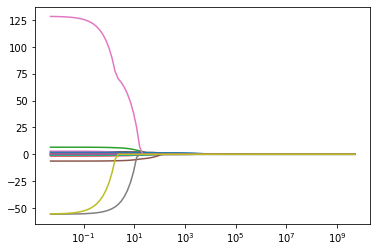

In [8]:
import matplotlib.pyplot as plt
ax = plt.gca()
ax.plot(lambdas, coefs)
ax.set_xscale("log")

In [9]:
pred_y = lasso_model.predict(x_test)

In [10]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, pred_y))

435.9524277225383

In [11]:
from sklearn.metrics import r2_score
r2_score(y_test, pred_y)

0.49823172329583487

In [18]:
#Determining a random alpha
from sklearn.linear_model import LassoCV
lasso_cv_model = LassoCV(cv = 10, max_iter = 100000).fit(x_train, y_train)

In [19]:
lasso_cv_model.alpha_

532.0684953135275

In [20]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_).fit(x_train, y_train)

In [21]:
pred_y = lasso_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test, pred_y))

463.4997475360425

In [22]:
pd.Series(lasso_tuned.coef_, index = x_train.columns)

AtBat          0.209022
Hits           0.000000
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          0.000000
Years          0.000000
CAtBat        -0.334711
CHits          0.761710
CHmRun         0.000000
CRuns          1.333562
CRBI           0.253013
CWalks         0.000000
PutOuts        0.318415
Assists       -0.000000
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64